In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

http://www.hannekedenouden.ruhosting.nl/RLtutorial/html/SoftMax.html

# The Rescorla-Wagner Model

$V_{s,t}$ = $V_{s,t-1}$ + $\alpha(r_{t-1} - V_{s,t-1})$

$V_{s,t}$: expected value of stimulus $s$ at trial $t$

$V_{s,t-1}$: expected value of stimulus $s$ at trial $t-1$

$\alpha$: learning rate

$r_{t-1}$: actual reward received at trial $t-1$


The expected value of trial $t$ is updated based on the prediction error, namely, $(r_{t-1} - V_{s,t-1})$. But such update is controlled by learning rate $\alpha$. 

Learning rate determines how much this prediction error is weighted.

Specifically, 

To re-arrange the model, 

$V_{s,t}$ = $V_{s,t-1}$ + $\alpha r_{t-1}$ - $\alpha(V_{s,t-1})$

= (1-$\alpha$)$V_{s,t-1}$ + $\alpha r_{t-1}$

When learning rate is high, the most recent outcome (i.e. $r_{t-1}$) has the most impact.

When learning rate is low, belief about past trials carry more weight.



*OG Rescorla-Wagner model has another factor called salience...

In [32]:
def rw(alpha, outcome, initial):
    updated = alpha * (outcome - initial)
    return initial + updated

def trial(alpha, outcome, initial, num_trials):
    count = 0
    expected_value = [initial]
    while count < num_trials:
        count+=1 
        new = rw(alpha, outcome, initial)
        initial = new # trial t+1 updated belief is the initial belief of t+2
        expected_value.append(initial)
    return expected_value



There are 20 trials. With an initial value of 0.5. Outcome is set to 1 and always will be 1. 

There are two learning rate -- one high and one low. 

How fast (trial number) can this learner to figure out outcome value = 1?

Text(0.5, 1.0, 'A comparison of learning rate')

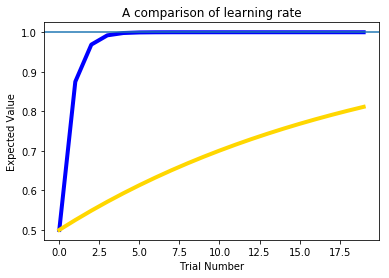

In [42]:
trial_no = list(range(0, 20))
expected_high = trial(0.75, 1.0, 0.5, 20)
expected_low = trial(0.05, 1.0, 0.5, 20)

plt.plot(trial_no, expected_high, color='blue', linewidth=4)
plt.plot(trial_no, expected_low, color='gold', linewidth=4)
plt.xlabel('Trial Number')
plt.ylabel('Expected Value')
plt.axhline(y = 1)
plt.title("A comparison of learning rate")




Force (learned) values into actions:

\begin{equation*}
p(A) = \frac{e^{\beta V_{s}}}{\sum_{i} e^{\beta V_{i}}}
\end{equation*}


To understand this, 

\begin{equation*}
p(A) = \frac{e^{\beta V_{A}}}{e^{\beta V_{A}}+e^{\beta V_{B}}}
\end{equation*}


Assume there are two actions A and B. Let Value_A = a and Value_B = 1 - a.

In [4]:
value_a = np.arange(0.0, 1.0, 0.02)
value_b = 1 - value_a

In [ ]:
for beta = betaArray
    ct = ct+1;
    pa(ct,:) = exp(beta*va)./(exp(beta*va)+exp(beta*vb)); % probability of choosing A
    leg{ct} = sprintf('beta = %d',beta);
    tmp = double(rand(1,length(va))< pa(ct,:))*(1+x*ct); % generate choices based on this data
    tmp(tmp==0)=tmp(tmp==0)-x*ct;
    data(ct,:) = tmp;
end

In [ ]:
def softmax(beta, value_a):
    
    A = np.exp(beta*value_a)/ np.sum(np.exp(value_a), axis=0)
    
    return A, cache